### 2. Feature Selection- With Pearson Correlation
In this step we will be removing the features which are highly correlated (between independant variable).

X => input variable(Independent variable) => Feature\
Y => Predicted variable(Dependent variable) => Label

Final touch:

    - If in features which variables(columns) are highly correlated with Label => We must keep this . 
    - That means Which independent varibles highly correlated with dependent variables we must keep this .
    - Our main focus on Find correlation between **Independent varibles** and keep ones instead multiple.
    - suppose we have 4 varibles are same and highly correlated , so dont need 4 , we can use any 1.

In [1]:
#importing libraries
from sklearn.datasets import load_boston
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [7]:
#Loading the dataset
data = load_boston()
df = pd.DataFrame(data.data, columns = data.feature_names)
df["MEDV"] = data.target


In [3]:
df.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT'],
      dtype='object')

In [4]:
data.target

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 18.7, 16. , 22.2, 25. , 33. , 23.5,
       19.4, 22. , 17.4, 20.9, 24.2, 21.7, 22.8, 23.4, 24.1, 21.4, 20. ,
       20.8, 21.2, 20.3, 28. , 23.9, 24.8, 22.9, 23.9, 26.6, 22.5, 22.2,
       23.6, 28.7, 22.6, 22. , 22.9, 25. , 20.6, 28.4, 21.4, 38.7, 43.8,
       33.2, 27.5, 26.5, 18.6, 19.3, 20.1, 19.5, 19.5, 20.4, 19.8, 19.4,
       21.7, 22.8, 18.8, 18.7, 18.5, 18.3, 21.2, 19.2, 20.4, 19.3, 22. ,
       20.3, 20.5, 17.3, 18.8, 21.4, 15.7, 16.2, 18. , 14.3, 19.2, 19.6,
       23. , 18.4, 15.6, 18.1, 17.4, 17.1, 13.3, 17.8, 14. , 14.4, 13.4,
       15.6, 11.8, 13.8, 15.6, 14.6, 17.8, 15.4, 21

In [6]:
data

{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
         4.9800e+00],
        [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
         9.1400e+00],
        [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
         4.0300e+00],
        ...,
        [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         5.6400e+00],
        [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
         6.4800e+00],
        [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         7.8800e+00]]),
 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
        18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
        15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
        13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
        21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
        35.4, 24.7, 3

In [8]:
df

CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0    0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1    0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2    0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3    0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4    0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   
..       ...   ...    ...   ...    ...    ...   ...     ...  ...    ...   
501  0.06263   0.0  11.93   0.0  0.573  6.593  69.1  2.4786  1.0  273.0   
502  0.04527   0.0  11.93   0.0  0.573  6.120  76.7  2.2875  1.0  273.0   
503  0.06076   0.0  11.93   0.0  0.573  6.976  91.0  2.1675  1.0  273.0   
504  0.10959   0.0  11.93   0.0  0.573  6.794  89.3  2.3889  1.0  273.0   
505  0.04741   0.0  11.93   0.0  0.573  6.030  80.8  2.5050  1.0  273.0   

     PTRATIO       B  LSTAT  MEDV  
0       15.3  396.90   4.98  24.0  
1       17.8  396.90   9.14  21.6  
2       17.8  392.83   4.03  34.7  
3       18.7  394.63   2.94  33.4  
4       18.7  396.90   5.33  36.2  
..       ...     ...    ...   ...  
501     21.0  391.99   9.67  22.4  
502     21.0  396.90   9.08  20.6  
503     21.0  396.90   5.64  23.9  
504     21.0  393.45   6.48  22.0  
505     21.0  396.90   7.88  11.9  

[506 rows x 14 columns]

In [9]:
type(data.feature_names)

numpy.ndarray

In [10]:
type(data)

sklearn.utils.Bunch

In [11]:
data.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [20]:
df.head()

CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

   PTRATIO       B  LSTAT  MEDV  
0     15.3  396.90   4.98  24.0  
1     17.8  396.90   9.14  21.6  
2     17.8  392.83   4.03  34.7  
3     18.7  394.63   2.94  33.4  
4     18.7  396.90   5.33  36.2

In [21]:
data.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [22]:
X = df.drop("MEDV",axis=1)   #Feature Matrix
y = df["MEDV"] 

In [23]:
X

CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0    0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1    0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2    0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3    0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4    0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   
..       ...   ...    ...   ...    ...    ...   ...     ...  ...    ...   
501  0.06263   0.0  11.93   0.0  0.573  6.593  69.1  2.4786  1.0  273.0   
502  0.04527   0.0  11.93   0.0  0.573  6.120  76.7  2.2875  1.0  273.0   
503  0.06076   0.0  11.93   0.0  0.573  6.976  91.0  2.1675  1.0  273.0   
504  0.10959   0.0  11.93   0.0  0.573  6.794  89.3  2.3889  1.0  273.0   
505  0.04741   0.0  11.93   0.0  0.573  6.030  80.8  2.5050  1.0  273.0   

     PTRATIO       B  LSTAT  
0       15.3  396.90   4.98  
1       17.8  396.90   9.14  
2       17.8  392.83   4.03  
3       18.7  394.63   2.94  
4       18.7  396.90   5.33  
..       ...     ...    ...  
501     21.0  391.99   9.67  
502     21.0  396.90   9.08  
503     21.0  396.90   5.64  
504     21.0  393.45   6.48  
505     21.0  396.90   7.88  

[506 rows x 13 columns]

In [24]:
y

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: MEDV, Length: 506, dtype: float64

In [25]:
df.head()

CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

   PTRATIO       B  LSTAT  MEDV  
0     15.3  396.90   4.98  24.0  
1     17.8  396.90   9.14  21.6  
2     17.8  392.83   4.03  34.7  
3     18.7  394.63   2.94  33.4  
4     18.7  396.90   5.33  36.2

In [26]:
X.head()

CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

   PTRATIO       B  LSTAT  
0     15.3  396.90   4.98  
1     17.8  396.90   9.14  
2     17.8  392.83   4.03  
3     18.7  394.63   2.94  
4     18.7  396.90   5.33

In [28]:
# separate dataset into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.3,
    random_state=0)

X_train.shape, X_test.shape , y_train.shape ,  y_test.shape

((354, 13), (152, 13), (354,), (152,))

In [29]:
y_train

141    14.4
272    24.4
135    18.1
298    22.5
122    20.5
       ... 
323    18.5
192    36.4
117    19.2
47     16.6
172    23.1
Name: MEDV, Length: 354, dtype: float64

We dont need to use same procedure for test dataset . We just find out the highly correlated variables(between independant variable) and drop them from train and test dataset (both)

In [30]:
X_train.corr()

CRIM        ZN     INDUS      CHAS       NOX        RM       AGE  \
CRIM     1.000000 -0.196172  0.382073 -0.049364  0.416560 -0.188280  0.329927   
ZN      -0.196172  1.000000 -0.529392 -0.063863 -0.523572  0.319260 -0.583885   
INDUS    0.382073 -0.529392  1.000000  0.044224  0.750218 -0.392969  0.629257   
CHAS    -0.049364 -0.063863  0.044224  1.000000  0.043748  0.088125  0.067269   
NOX      0.416560 -0.523572  0.750218  0.043748  1.000000 -0.279202  0.740052   
RM      -0.188280  0.319260 -0.392969  0.088125 -0.279202  1.000000 -0.235839   
AGE      0.329927 -0.583885  0.629257  0.067269  0.740052 -0.235839  1.000000   
DIS     -0.355840  0.658331 -0.686848 -0.085492 -0.765753  0.183857 -0.761543   
RAD      0.603880 -0.314833  0.578459  0.022338  0.627188 -0.179242  0.440578   
TAX      0.560570 -0.327834  0.719038 -0.017156  0.683445 -0.275242  0.502429   
PTRATIO  0.264780 -0.392838  0.388353 -0.072683  0.179046 -0.385526  0.239729   
B       -0.299525  0.164641 -0.331638  0.069682 -0.369445  0.157459 -0.250416   
LSTAT    0.439369 -0.429178  0.603374 -0.059060  0.577154 -0.623920  0.606530   

              DIS       RAD       TAX   PTRATIO         B     LSTAT  
CRIM    -0.355840  0.603880  0.560570  0.264780 -0.299525  0.439369  
ZN       0.658331 -0.314833 -0.327834 -0.392838  0.164641 -0.429178  
INDUS   -0.686848  0.578459  0.719038  0.388353 -0.331638  0.603374  
CHAS    -0.085492  0.022338 -0.017156 -0.072683  0.069682 -0.059060  
NOX     -0.765753  0.627188  0.683445  0.179046 -0.369445  0.577154  
RM       0.183857 -0.179242 -0.275242 -0.385526  0.157459 -0.623920  
AGE     -0.761543  0.440578  0.502429  0.239729 -0.250416  0.606530  
DIS      1.000000 -0.467653 -0.519643 -0.176620  0.248376 -0.501780  
RAD     -0.467653  1.000000  0.907455  0.437687 -0.415325  0.442783  
TAX     -0.519643  0.907455  1.000000  0.447518 -0.412145  0.515905  
PTRATIO -0.176620  0.437687  0.447518  1.000000 -0.145638  0.387752  
B        0.248376 -0.415325 -0.412145 -0.145638  1.000000 -0.365338  
LSTAT   -0.501780  0.442783  0.515905  0.387752 -0.365338  1.000000

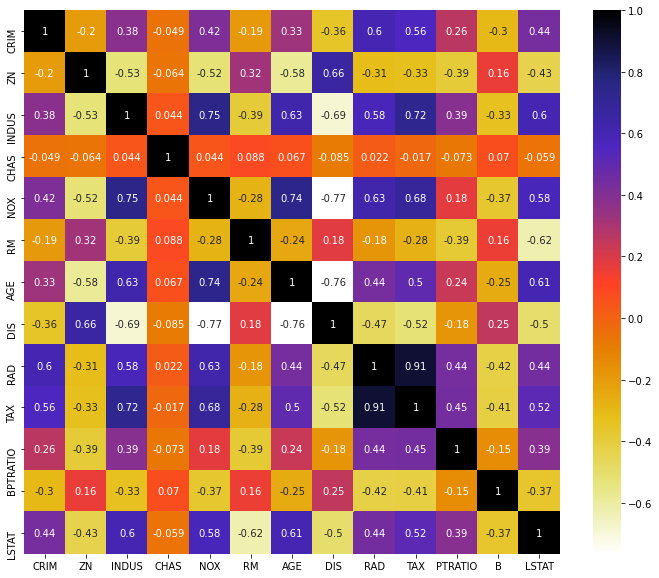

In [31]:
import seaborn as sns
#Using Pearson Correlation
plt.figure(figsize=(12,10))
cor = X_train.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.CMRmap_r) # you can use any color
plt.show()

In [36]:
len(cor.columns) 


13

In [37]:
cor.shape

(13, 13)

In [50]:
# with the following function we can select highly correlated features
# it will remove the first feature that is correlated with anything other feature

def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns . Here is a trick use set not list (think about it baby)
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                
                colname = corr_matrix.columns[i]  # getting the name of column [change i and j  => i(rows) and j(columns)]
                col_corr.add(colname)
    return col_corr

In [52]:
corr_features = correlation(X_train, 0.7) # you can change this threshold value and check it
len(list(corr_features))

4

In [53]:
corr_features

{'AGE', 'DIS', 'NOX', 'TAX'}

In [54]:
X_train.drop(corr_features,axis=1)
X_test.drop(corr_features,axis=1)

CRIM   ZN  INDUS  CHAS     RM   RAD  PTRATIO       B  LSTAT
329   0.06724  0.0   3.24   0.0  6.333   4.0     16.9  375.21   7.34
371   9.23230  0.0  18.10   0.0  6.216  24.0     20.2  366.15   9.53
219   0.11425  0.0  13.89   1.0  6.373   5.0     16.4  393.74  10.50
403  24.80170  0.0  18.10   0.0  5.349  24.0     20.2  396.90  19.77
78    0.05646  0.0  12.83   0.0  6.232   5.0     18.7  386.40  12.34
..        ...  ...    ...   ...    ...   ...      ...     ...    ...
4     0.06905  0.0   2.18   0.0  7.147   3.0     18.7  396.90   5.33
428   7.36711  0.0  18.10   0.0  6.193  24.0     20.2   96.73  21.52
385  16.81180  0.0  18.10   0.0  5.277  24.0     20.2  396.90  30.81
308   0.49298  0.0   9.90   0.0  6.635   4.0     18.4  396.90   4.54
5     0.02985  0.0   2.18   0.0  6.430   3.0     18.7  394.12   5.21

[152 rows x 9 columns]

#### Let try with Big Dataset
https://www.kaggle.com/c/santander-customer-satisfaction/data?select=train.csv

In [58]:
df=pd.read_csv('santader_train.csv',nrows=10000)
X=df.drop(labels=['TARGET'], axis=1)
y=df['TARGET']
# separate dataset into train and test
X_train, X_test, y_train, y_test = train_test_split(
    df.drop(labels=['TARGET'], axis=1),
    df['TARGET'],
    test_size=0.3,
    random_state=0)

X_train.shape, X_test.shape , y_train.shape ,  y_test.shape

((7000, 370), (3000, 370), (7000,), (3000,))

<AxesSubplot:>

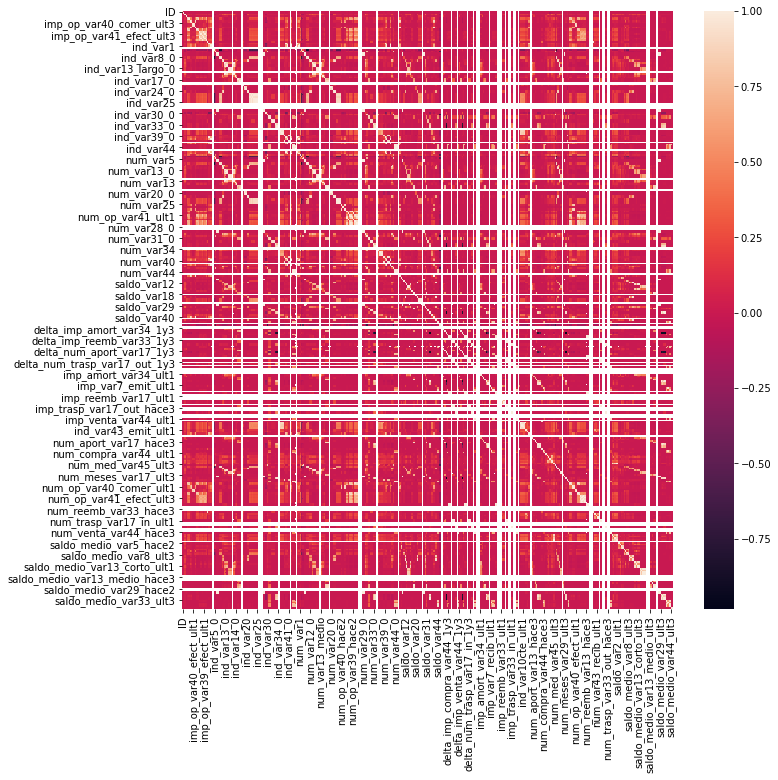

In [59]:
import seaborn as sns
#Using Pearson Correlation
corrmat = X_train.corr()
fig, ax = plt.subplots()
fig.set_size_inches(11,11)
sns.heatmap(corrmat)

In [60]:
corr_features = correlation(X_train, 0.8)
len(set(corr_features))

193

In [61]:
corr_features

{'delta_imp_aport_var17_1y3',
 'delta_imp_aport_var33_1y3',
 'delta_num_aport_var13_1y3',
 'delta_num_aport_var17_1y3',
 'delta_num_aport_var33_1y3',
 'delta_num_compra_var44_1y3',
 'delta_num_reemb_var13_1y3',
 'delta_num_trasp_var17_in_1y3',
 'delta_num_trasp_var33_in_1y3',
 'delta_num_venta_var44_1y3',
 'imp_aport_var17_ult1',
 'imp_aport_var33_hace3',
 'imp_compra_var44_ult1',
 'imp_op_var39_comer_ult3',
 'imp_op_var39_efect_ult1',
 'imp_op_var39_efect_ult3',
 'imp_op_var39_ult1',
 'imp_op_var40_comer_ult3',
 'imp_op_var40_efect_ult3',
 'imp_op_var40_ult1',
 'imp_op_var41_comer_ult1',
 'imp_op_var41_comer_ult3',
 'imp_op_var41_efect_ult3',
 'imp_op_var41_ult1',
 'imp_reemb_var13_ult1',
 'imp_trasp_var17_in_ult1',
 'imp_trasp_var33_in_ult1',
 'imp_venta_var44_ult1',
 'ind_var10_ult1',
 'ind_var10cte_ult1',
 'ind_var12',
 'ind_var13',
 'ind_var13_corto',
 'ind_var13_corto_0',
 'ind_var13_largo',
 'ind_var17',
 'ind_var20',
 'ind_var24',
 'ind_var24_0',
 'ind_var25',
 'ind_var25_0',
 

In [62]:
X_train.drop(corr_features,axis=1)

ID  var3  var15  imp_ent_var16_ult1  imp_op_var39_comer_ult1  \
7681  15431     2     42               840.0                  4477.02   
9031  18181     2     31                 0.0                    52.32   
3691   7411     2     51                 0.0                     0.00   
202     407     2     36                 0.0                     0.00   
5625  11280     2     23                 0.0                     0.00   
...     ...   ...    ...                 ...                      ...   
9225  18564     2     33                 0.0                     0.00   
4859   9723     2     24                 0.0                     0.00   
3264   6557     2     24                 0.0                     0.00   
9845  19796     2     38                 0.0                     0.00   
2732   5441     2     23                 0.0                     0.00   

      imp_op_var40_comer_ult1  imp_op_var40_efect_ult1  \
7681                      0.0                        0   
9031                      0.0                        0   
3691                      0.0                        0   
202                       0.0                        0   
5625                      0.0                        0   
...                       ...                      ...   
9225                      0.0                        0   
4859                      0.0                        0   
3264                      0.0                        0   
9845                      0.0                        0   
2732                      0.0                        0   

      imp_op_var41_efect_ult1  imp_sal_var16_ult1  ind_var1_0  ...  \
7681                      0.0                   0           0  ...   
9031                      0.0                   0           0  ...   
3691                      0.0                   0           0  ...   
202                       0.0                   0           0  ...   
5625                      0.0                   0           0  ...   
...                       ...                 ...         ...  ...   
9225                      0.0                   0           0  ...   
4859                      0.0                   0           0  ...   
3264                      0.0                   0           0  ...   
9845                    150.0                   0           0  ...   
2732                      0.0                   0           0  ...   

      saldo_medio_var13_corto_hace3  saldo_medio_var13_medio_hace2  \
7681                            0.0                              0   
9031                            0.0                              0   
3691                            0.0                              0   
202                          2412.0                              0   
5625                            0.0                              0   
...                             ...                            ...   
9225                            0.0                              0   
4859                            0.0                              0   
3264                            0.0                              0   
9845                            0.0                              0   
2732                            0.0                              0   

      saldo_medio_var13_medio_hace3  saldo_medio_var13_medio_ult1  \
7681                              0                             0   
9031                              0                             0   
3691                              0                             0   
202                               0                             0   
5625                              0                             0   
...                             ...                           ...   
9225                              0                             0   
4859                              0                             0   
3264                              0                             0   
9845                              0                            